In [26]:
%pip install yfinance
%pip install mplfinance
%pip install scikit-learn
%pip install tensorflow
%pip install statsmodels
# !pip install arch

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [27]:
import tensorflow as tf
print("Versão do TensorFlow:", tf.__version__)

Versão do TensorFlow: 2.17.0


In [28]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# from arch import arch_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


A condição > 0 verifica se o retorno percentual do próximo dia (shift(-1)) é positivo (ou seja, se o preço vai subir).

In [29]:
# Baixar os dados das ações da DOGE
dogecoin = yf.download('DOGE-USD', period='1y')
dogecoin

# # Buscando os dados da ação da Apple
# dogecoin = yf.Ticker('DOGE-USD')
# dogecoin_data = dogecoin.history(period='1y')
# dogecoin_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-25,0.060742,0.061200,0.060545,0.060959,0.060959,117409471
2023-09-26,0.060956,0.061116,0.059907,0.060599,0.060599,141794234
2023-09-27,0.060593,0.061332,0.060275,0.060504,0.060504,153818653
2023-09-28,0.060497,0.061661,0.060406,0.061484,0.061484,137019315
2023-09-29,0.061486,0.062310,0.061385,0.062178,0.062178,141947701
...,...,...,...,...,...,...
2024-09-21,0.105471,0.110373,0.104152,0.110049,0.110049,502306053
2024-09-22,0.110049,0.110050,0.104020,0.106339,0.106339,480950368
2024-09-23,0.106339,0.109084,0.104720,0.108156,0.108156,644419670


In [30]:
# Criar uma coluna de retorno diário
dogecoin['Return'] = dogecoin['Close'].pct_change()

# Criar a variável target: 1 para subida e 0 para descida
dogecoin['Target'] = (dogecoin['Return'].shift(-1) > 0).astype(int)

# Remover valores nulos
dogecoin.dropna(inplace=True)

In [31]:
dogecoin.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Target
Date,,,,,,,,
2023-09-26,0.060956,0.061116,0.059907,0.060599,0.060599,141794234,-0.005906,0
2023-09-27,0.060593,0.061332,0.060275,0.060504,0.060504,153818653,-0.001568,1
2023-09-28,0.060497,0.061661,0.060406,0.061484,0.061484,137019315,0.016197,1
2023-09-29,0.061486,0.062310,0.061385,0.062178,0.062178,141947701,0.011287,0
2023-09-30,0.062180,0.062506,0.061799,0.062141,0.062141,124411353,-0.000595,1


**Relação entre o preço de fechamento (Close) e o preço de abertura (Open)**

In [32]:
# Supondo que o dataset já está carregado em um DataFrame chamado df
dogecoin['Close/Open'] = dogecoin['Close'] / dogecoin['Open']

In [33]:
dogecoin.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Target,Close/Open
Date,,,,,,,,,
2023-09-26,0.060956,0.061116,0.059907,0.060599,0.060599,141794234,-0.005906,0,0.994143
2023-09-27,0.060593,0.061332,0.060275,0.060504,0.060504,153818653,-0.001568,1,0.998531
2023-09-28,0.060497,0.061661,0.060406,0.061484,0.061484,137019315,0.016197,1,1.016315
2023-09-29,0.061486,0.062310,0.061385,0.062178,0.062178,141947701,0.011287,0,1.011255
2023-09-30,0.062180,0.062506,0.061799,0.062141,0.062141,124411353,-0.000595,1,0.999373


Descrição das colunas: 
- Open: Preço de abertura da Dogecoin em um determinado dia. Esse valor reflete o primeiro preço pelo qual a Dogecoin foi negociada no dia.

- High: O preço máximo atingido pela Dogecoin no dia.

- Low: O preço mínimo atingido pela Dogecoin no dia.

- Close: Preço de fechamento da Dogecoin no dia. Este é o último valor pelo qual a Dogecoin foi negociada.

- Adj Close: Preço de fechamento ajustado para dividendos, splits, etc. Como no caso de criptomoedas, ele geralmente coincide com o valor de Close, **essa coluna será removida.**

- Volume: Número total de moedas negociadas no dia.

- Return: Variação percentual diária entre o preço de fechamento de um dia e o do dia anterior.

- Target: Valor binário (1 ou 0) indicando se o preço da Dogecoin irá subir ou descer no dia seguinte. Ele é calculado com base no retorno do próximo dia.

- Close/Open: Razão entre o preço de fechamento e o preço de abertura no mesmo dia.

In [34]:
dogecoin.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Return',
       'Target', 'Close/Open'],
      dtype='object')

In [35]:
dogecoin.drop(columns=['Adj Close'], inplace=True)
dogecoin.head()

,Open,High,Low,Close,Volume,Return,Target,Close/Open
Date,,,,,,,,
2023-09-26,0.060956,0.061116,0.059907,0.060599,141794234,-0.005906,0,0.994143
2023-09-27,0.060593,0.061332,0.060275,0.060504,153818653,-0.001568,1,0.998531
2023-09-28,0.060497,0.061661,0.060406,0.061484,137019315,0.016197,1,1.016315
2023-09-29,0.061486,0.062310,0.061385,0.062178,141947701,0.011287,0,1.011255
2023-09-30,0.062180,0.062506,0.061799,0.062141,124411353,-0.000595,1,0.999373


In [36]:
# # 5. Rescale the returns for better GARCH parameter estimation (recomended)
# dogecoin['Return_scaled'] = dogecoin['Return'] * 100

Normalização dos dados

In [37]:
import math
import numpy as np
  
# Normalização Z-score
for column in dogecoin.columns:
    dogecoin[column] = (dogecoin[column] - dogecoin[column].mean()) / dogecoin[column].std()

Analise dos dados

In [38]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mplfinance as mpf
from numpy.polynomial import Polynomial
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
# from arch import arch_model

In [39]:

from numpy.polynomial import Polynomial

# Ajuste polinomial de grau 3, por exemplo
coefs = Polynomial.fit(X['Date_Ordinal'], y, 3)
dogecoin['Polynomial_Trend'] = coefs(X['Date_Ordinal'])

plt.figure(figsize=(12, 6))
plt.plot(dogecoin['Close'], label='Preço de Fechamento', color='blue')
plt.plot(dogecoin['Polynomial_Trend'], label='Tendência Polinomial', color='orange')
plt.title('Tendência Polinomial')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.legend()
plt.grid(True)
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

# Criação do modelo V1oooooo

In [40]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 1. Extraindo e normalizando os dados
df = dogecoin[['Close']].dropna()
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# 2. Função para criar sequências
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps, 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

# 3. Criar sequências
time_steps = 60
X, y = create_sequences(scaled_data, time_steps)

# 4. Reshape dos dados
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# 5. Dividir os dados em treino e teste
split = int(X.shape[0] * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

In [41]:
print("Forma de X_train:", X_train.shape)  # Deve ser (n_samples, 60, 1)
print("Forma de y_train:", y_train.shape)    # Deve ser (n_samples,)

Forma de X_train: (244, 60, 1)
Forma de y_train: (244,)


In [42]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Criar um conjunto de dados aleatório
X_test_random = np.random.rand(10, 60, 1)  # 10 amostras, 60 timesteps, 1 feature
y_test_random = np.random.rand(10)

# Construir o modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_test_random.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compilar o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Tentar treinar o modelo com dados aleatórios
history = model.fit(X_test_random, y_test_random, epochs=5, batch_size=1)


Epoch 1/5


/home/linguica/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4344 
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1510
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0748    
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0937
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1557


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


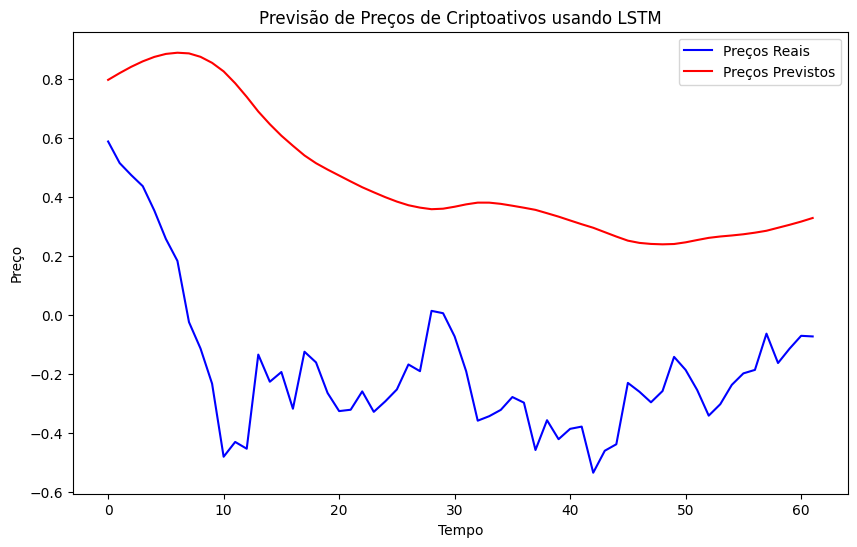

In [43]:
# Fazer previsões sobre os dados de teste
predicted_prices = model.predict(X_test)

# Desfazer a normalização para os valores previstos e reais
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotar os preços reais vs preços previstos
plt.figure(figsize=(10, 6))
plt.plot(real_prices, color='blue', label='Preços Reais')
plt.plot(predicted_prices, color='red', label='Preços Previstos')
plt.title('Previsão de Preços de Criptoativos usando LSTM')
plt.xlabel('Tempo')
plt.ylabel('Preço')
plt.legend()
plt.show()

In [44]:
def predict_future_days(model, last_sequence, num_days, scaler):
    future_predictions = []
    current_sequence = last_sequence

    for _ in range(num_days):
        # Fazer a previsão para o próximo dia
        next_prediction = model.predict(current_sequence)
        
        # Armazenar a previsão
        future_predictions.append(next_prediction[0, 0])
        
        # Redimensionar a previsão para ser compatível com a sequência de entrada
        next_prediction_reshaped = np.reshape(next_prediction, (1, 1, 1))
        
        # Atualizar a sequência com o valor previsto (remover o valor mais antigo e adicionar o novo)
        current_sequence = np.append(current_sequence[:, 1:, :], next_prediction_reshaped, axis=1)

    # Desfazer a normalização dos valores previstos
    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

    return future_predictions

In [45]:
# Pegar os últimos `time_steps` do conjunto de dados de teste
last_sequence = scaled_data[-time_steps:].reshape(1, time_steps, 1)

# Prever para os próximos 7 dias
num_days = 7
future_prices = predict_future_days(model, last_sequence, num_days, scaler)

# Exibir as previsões para os próximos 7 dias
for i, price in enumerate(future_prices):
    print(f"Previsão para o dia {i+1}: {price[0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Previsão para o dia 1: 0.34
Previsão para o dia 2: 0.37
Previsão para o dia 3: 0.40
Previsão para o dia 4: 0.43
Previsão para o dia 5: 0.47
Previsão para o dia 6: 0.51
Previsão para o dia 7: 0.55


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


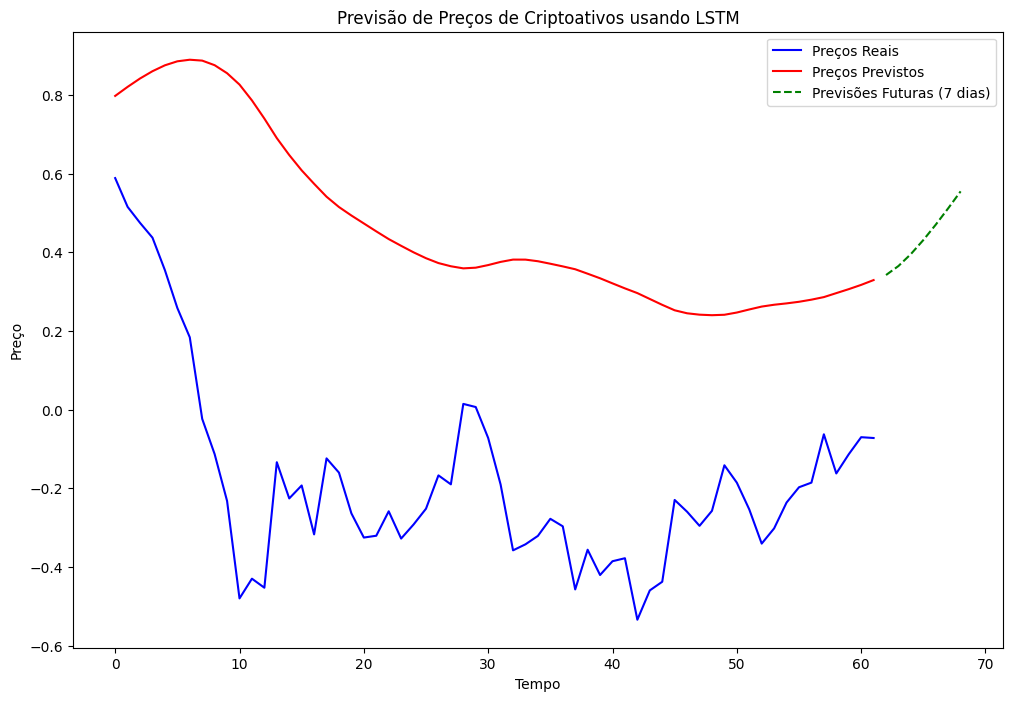

In [46]:
# Fazer previsões sobre os dados de teste
predicted_prices = model.predict(X_test)

# Desfazer a normalização para os valores previstos e reais
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Prever os próximos 7 dias
num_days = 7
last_sequence = scaled_data[-time_steps:].reshape(1, time_steps, 1)
future_prices = predict_future_days(model, last_sequence, num_days, scaler)

# Criar um vetor de tempo para as previsões futuras
future_time = np.arange(len(real_prices), len(real_prices) + num_days)

# Plotar os preços reais, preços previstos e previsões futuras
plt.figure(figsize=(12, 8))

# Plotar os dados reais
plt.plot(real_prices, color='blue', label='Preços Reais')

# Plotar os dados previstos para o conjunto de teste
plt.plot(predicted_prices, color='red', label='Preços Previstos')

# Adicionar as previsões dos próximos 7 dias
plt.plot(future_time, future_prices, color='green', label='Previsões Futuras (7 dias)', linestyle='dashed')

# Ajustar o gráfico
plt.title('Previsão de Preços de Criptoativos usando LSTM')
plt.xlabel('Tempo')
plt.ylabel('Preço')
plt.legend()
plt.show()

In [47]:
import pickle

# Supondo que `model` é o seu modelo treinado
with open('model_lstm.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Modelo salvo como 'model_lstm.pkl'")

Modelo salvo como 'model_lstm.pkl'
